1.**Data Loading:**

In [24]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [5]:
#loading the dataset
df = pd.read_csv('boston.csv')
df.head()

,CRIM,CRIM.1,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


2.**Data Exploration**:

In [7]:
#exploring the data 

# Get a summary of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

             CRIM      CRIM.1       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

3.**Exploratory Data Analysis**:

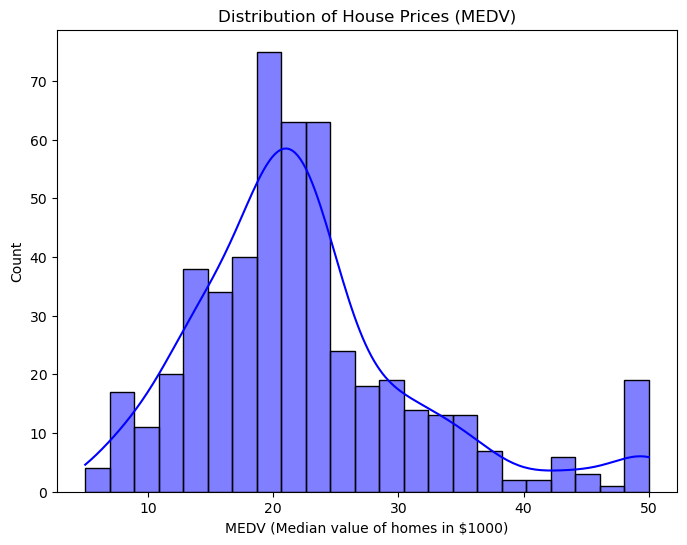

In [9]:
#visualizing house price varibale (the target variable "MEDV")
plt.figure(figsize=(8,6))
sns.histplot(df['MEDV'], kde=True, color='blue')
plt.title('Distribution of House Prices (MEDV)')
plt.xlabel('MEDV (Median value of homes in $1000)')
plt.show()


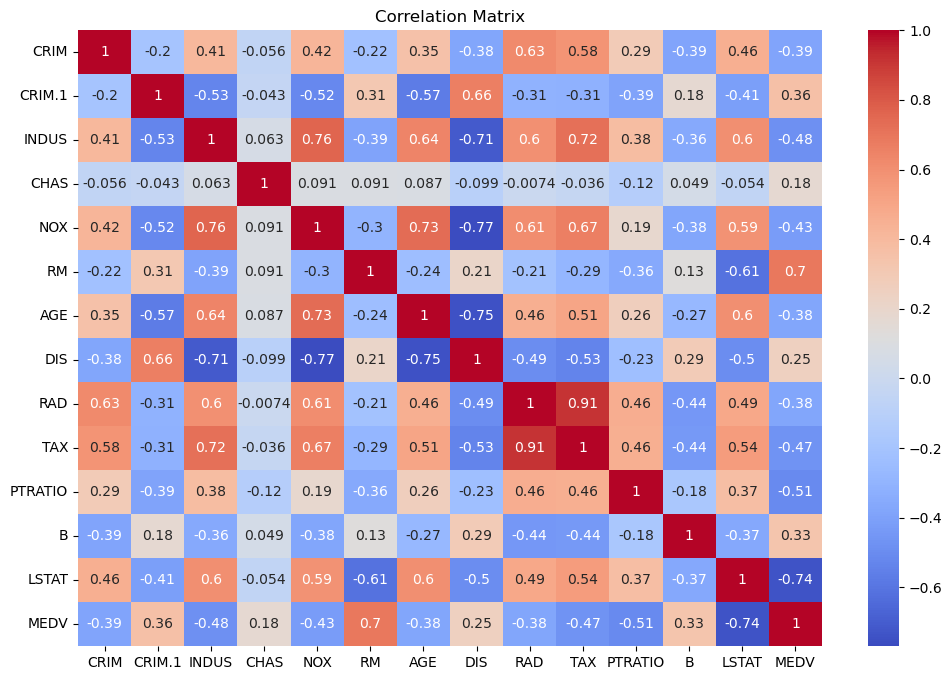

In [11]:
#analyzying the correlation between MEDV and the other dataset features 
# Correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


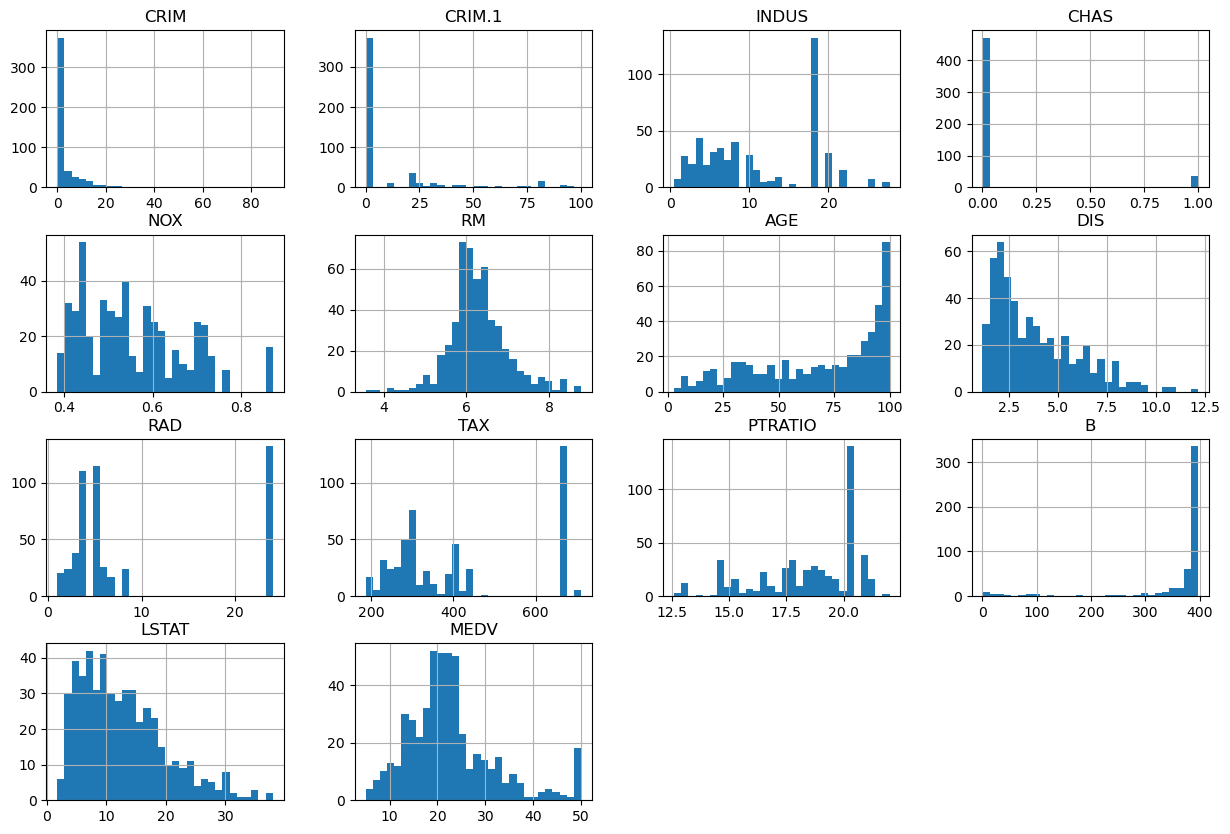

In [70]:
#visualizing each feature 
df.hist(bins=30, figsize=(15, 10))
plt.show()

4.**Building The Model**:


In [ ]:
# defining the  features and target variable 
X = df.drop(columns='MEDV', axis=1)
y = df['MEDV']

#we preprocess the data by spliting into testing(20%) & training sets(80%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiating a Linear Regression model since the relationship between tha target variable MEDV and most of the other features seems linear  
model = LinearRegression()

model.fit(X_train , y_train)

y_pred = model.predict(X_test)

5. **Evaluating The Model's Performance:**

- **R-squared (r2)**: Measures the proportion of the variance in the target variable that is predictable from the features. Values closer to 1 indicate a better fit.

- **Mean Squared Error (MSE)**: Represents the average squared difference between predicted and actual values. Lower values indicate better model performance.

- **Root Mean Squared Error (RMSE)**: The square root of MSE, giving error in the same units as the target variable. It provides a measure of the average magnitude of errors. Lower values are better.

In [74]:
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = mse**(1/2)

print(f'R_squared: {r2}')

print(f'MSE: {mse}')

print(f'RMSE: {rmse}')

R_squared: 0.6687594935356307
MSE: 24.291119474973613
RMSE: 4.928602182665346


- **R-squared (0.669):** The model explains 66.9% of the variance in house prices, indicating a decent fit.
- **MSE (24.29)**: The average squared error between predicted and actual values is 24.29, showing reasonable accuracy.
- **RMSE (4.93)**: The average difference between predicted and actual house prices is 4.93 units, suggesting the model performs well.


To evaluate the model further and get closer results , wee will use Cross Validation :


**Cross Validation**:
  a technique used to assess a model’s performance by splitting the data into multiple subsets, training the model on some subsets, and testing it on the others. This process is repeated across different splits to ensure a more reliable and unbiased evaluation

In [47]:
#let's evaluate the model 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"Cross-validated RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")

Cross-validated RMSE: 5.828658946215812 ± 1.7772288418764175


`The mean RMSE of 5.12` indicates that, on average, the model's predictions are off by `5.12 units` (in the target variable's scale).
The `± 0.3` represents the standard deviation, meaning the model's performance is consistent, with only slight variation (0.3 units) across the different data splits (folds).


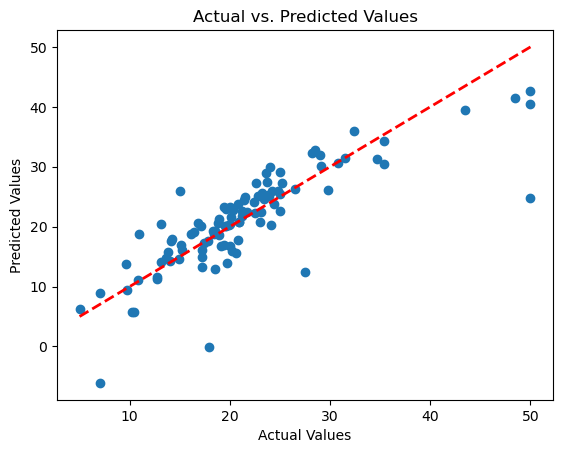

In [59]:
#plotting the actual values VS the predicted ones 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()


The graph indicates a relatively good model fit. The line's proximity to the data points suggests that the model captures the general trend well and makes (slightly) accurate predictions for most values. (can be enhanced further)